# Data

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History, Callback
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate,LeakyReLU
from keras.initializers import Ones
from keras.optimizers import Adam
from keras.initializers import HeNormal

from utils import dataloader, binary_accuracy, setup, create_sequences

np.random.seed(2024)

In [38]:
dfs, labels, pdf, n_feature, companies = dataloader()

labels[0].shape:  (19,)
dfs[0].shape:  (19, 29)


In [39]:
train_length, test_length, total_length = 14, 5, 19
n_epochs = 2000
lr = 1e-5

In [40]:
def show_test_performance(test_predictions, test_labels, all_labels, pchange, company):
    tp, tn, fp, fn = binary_accuracy(pchange, test_labels)
    print("true increase: {:.0%}\ntrue decrease: {:.0%}\nfalse increase: {:.0%}\nfalse decrease: {:.0%}\n".format(tp, tn, fp, fn))
    # Plot the actual and predicted values
    x = np.arange(total_length-test_length, total_length)
    plt.scatter(x, test_predictions, label='Predicted Testing Labels', c='lightpink')

    plt.plot(all_labels.tolist(), marker='x', label='Actual Testing Labels', c='skyblue')
    plt.title('Performance on '+company+' stock')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    return tp, tn, fp, fn

In [41]:
path = "model_deeperlstm"
setup(path)

# Initialize the bi_record dictionary
bi_record = {'tps':[], 'tns':[], 'fps':[], 'fns':[]}

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1,n_feature), kernel_initializer='random_normal'),
    LSTM(128, input_shape=(1, n_feature), kernel_initializer='random_normal'),
    Dense(64, activation='relu', kernel_initializer='random_normal'),
    Dense(1)
])
model.save_weights(path+'/init_keras_model.weights.h5')

/Users/jiaruiz/miniforge3/envs/6998/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


sample  0 :  AAPL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
52.195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
60.814999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
79.422501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
73.449997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
96.190002
[0.079288766, 0.07985309, 0.07761537, 0.07282191, 0.069806986]
true increase: 80%
true decrease: 0%
false increase: 20%
false decrease: 0%



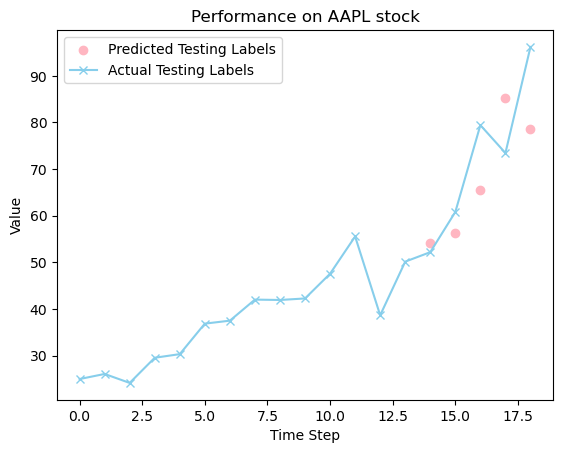

sample  1 :  AMZN
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1973.819946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1780.780029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1870.680054


/Users/jiaruiz/miniforge3/envs/6998/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 0 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2474.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3051.879883
[0.05417839, 0.05417839, 0.05417839, 0.05417839, 0.05417839]
true increase: 80%
true decrease: 0%
false increase: 20%
false decrease: 0%



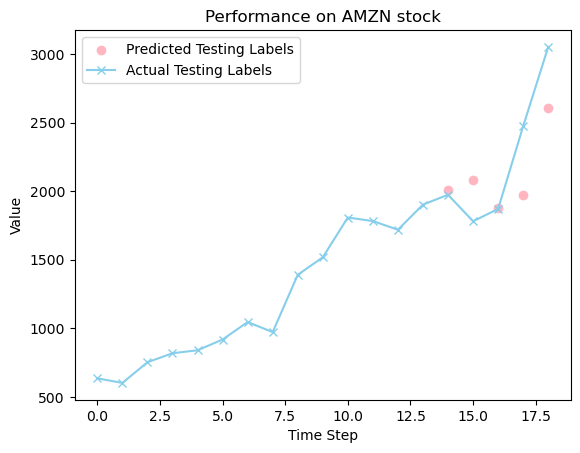

sample  2 :  GOOGL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1135.939941
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1288.97998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1482.599976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1232.589966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1538.369995
[0.05417839, 0.05417839, 0.05417839, 0.05417839, 0.05417839]
true increase: 60%
true decrease: 0%
false increase: 40%
false decrease: 0%



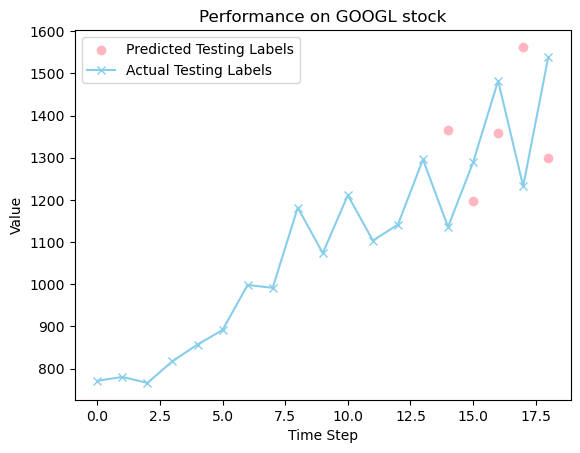

sample  3 :  MSFT
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
136.419998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
137.240005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
168.039993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
177.429993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
211.75
[0.05417839, 0.05417839, 0.05417839, 0.05417839, 0.05417839]
true increase: 100%
true decrease: 0%
false increase: 0%
false decrease: 0%



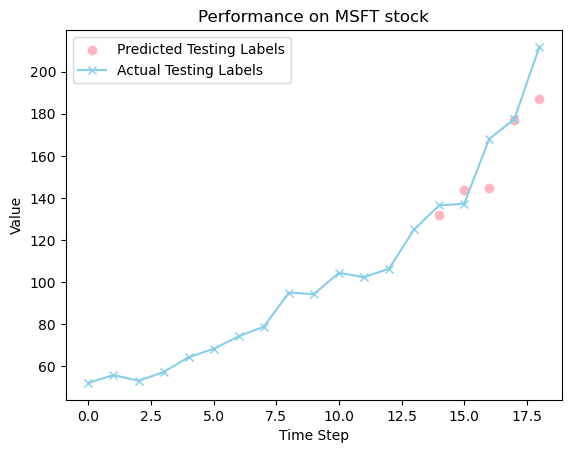

sample  4 :  NVDA
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
148.770004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
209.789993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
270.779999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
351.01001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
485.540009
[0.05417839, 0.05417839, 0.05417839, 0.05417839, 0.05417839]
true increase: 80%
true decrease: 0%
false increase: 20%
false decrease: 0%



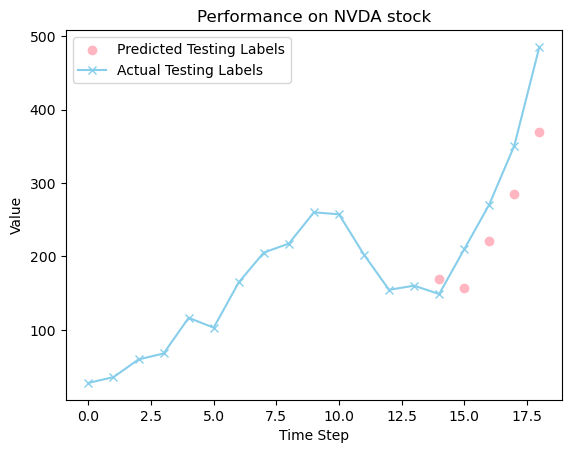

tps 0.8
tns 0.0
fps 0.2
fns 0.0


In [42]:
for i in range(len(companies)):
    print("sample ", i, ": ", companies[i])
    model.load_weights(path+'/'+companies[i]+'_keras_model.weights.h5' if os.path.exists(path+'/'+companies[i]+'_keras_model.weights.h5') else path+'/init_keras_model.weights.h5')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), 
                  loss='mean_squared_error')

    X = dfs[i].to_numpy()
    Y = labels[i].to_numpy()

    X_train, Y_train = create_sequences(X[:train_length], Y[:train_length], window_size=3)
    X_test, Y_test = create_sequences(X[train_length-3:], Y[train_length-3:], window_size=3)
    
    # model.fit(X_train, Y_train, epochs=n_epochs, batch_size=1, verbose=0)

    last_known_value = Y[train_length - 1]  # Correct handling of initial value
    predictions = []
    pchange = []
    for j in range(test_length):
        x_input = X_test[j]
        x_input = x_input.reshape((1, x_input.shape[0], x_input.shape[1]))
        percentage_change = model.predict(x_input)[0][0]
        pchange.append(percentage_change)
        next_value = last_known_value * (1 + percentage_change)
        last_known_value = Y[train_length+j]
        print(last_known_value)
        predictions.append(next_value)

    print(pchange)
    test_predictions = np.array(predictions)
    tp, tn, fp, fn = show_test_performance(test_predictions, Y[train_length-1:], Y, pchange, companies[i])
    bi_record['tps'].append(tp)
    bi_record['tns'].append(tn)
    bi_record['fps'].append(fp)
    bi_record['fns'].append(fn)

    model.save_weights(path+'/'+companies[i]+'_keras_model.weights.h5')

for key in bi_record:
    score = np.array(bi_record[key]).mean()
    print(key, score)
